In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nose.tools
# Write your imports here

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. Data mining process as a whole

### Problem 1. Read the dataset (1 point)
You'll be exploring data about people's income. Your task is to understand whether there are significant differences in the lifestyle of lower- vs. higher-income groups.

Read the dataset located [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data). The information file is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Save it into the variable `income_data`. Change the column names to what you like. The last column is related to the income class.

Get acquainted with the information file well before starting work.

You don't need to clean the dataset.

In [3]:
income_data = None
### BEGIN SOLUTION
income_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep = ", ", header = None)
income_data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
### END SOLUTION

C:\Users\Yordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
nose.tools.assert_is_not_none(income_data)
### BEGIN HIDDEN TESTS
income_data_test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep = ", ", header = None)
income_data_test.columns = income_data.columns

nose.tools.assert_equal(income_data.shape, income_data_test.shape)
### END HIDDEN TESTS

C:\Users\Yordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


### Problem 2. High income (1 point)
How many people have high income (over 50 000 USD per year)? Write a function to return the value. The function should accept the dataframe as a parameter. Work with that parameter.

In [5]:
def get_num_people_with_high_income(dataframe):
    ### BEGIN SOLUTION
    return len(dataframe[dataframe.income == ">50K"])
    ### END SOLUTION

In [6]:
# This cell contains hidden tests
### BEGIN HIDDEN TESTS
nose.tools.assert_equal(get_num_people_with_high_income(income_data), 7841)
nose.tools.assert_equal(get_num_people_with_high_income(income_data), get_num_people_with_high_income(income_data_test))
### END HIDDEN TESTS

### Problem 3. Capital gain: thresholding (1 point)
Plot a histogram of the capital gain. You can see that there are many people with relatively low gains and a few people - with very high gains.

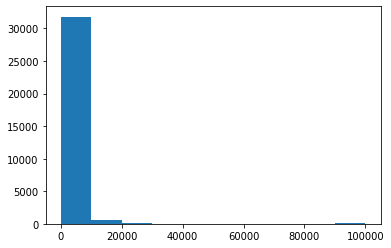

In [7]:
### BEGIN SOLUTION
plt.hist(income_data["capital-gain"])
plt.show()
### END SOLUTION

Write a function which accepts a dataframe and a capital gain value (in USD) and returns how many people are there with **greater than or equal to** that threshold gain.

In [8]:
def get_num_people_with_higher_gain(dataframe, threshold_gain):
    ### BEGIN SOLUTION
    return len(dataframe[dataframe["capital-gain"] >= threshold_gain])
    ### END SOLUTION

In [9]:
nose.tools.assert_equal(get_num_people_with_higher_gain(income_data, 60000), 159)
### BEGIN HIDDEN TESTS
for threshold, expected_income in [[20000, 253], [30000, 166], [45000, 159], [60000, 159], [1000000000, 0], [0, 32561]]:
    nose.tools.assert_equal(get_num_people_with_higher_gain(income_data, threshold), get_num_people_with_higher_gain(income_data_test, threshold))
    nose.tools.assert_equal(get_num_people_with_higher_gain(income_data, threshold), expected_income)
    ### END HIDDEN TESTS

Create a pie chart of the number of people by marital status.

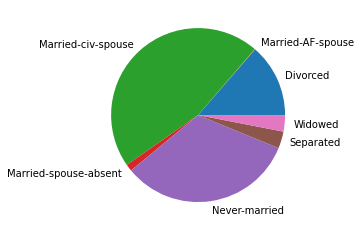

In [10]:
### BEGIN SOLUTION
groups = income_data.groupby("marital-status").count()
plt.pie(groups.income, labels = groups.index)
plt.gca().set_aspect("equal")
### END SOLUTION

### Problem 4. Marital status (2 points)
Which type of marital status is the most prominent (i.e. has the most people)? How many are there? Write a function that **calculates and returns the two answers**. 

In [11]:
def most_prominent_marital_status(dataframe):
    status = ""
    num_people = 0
    ### BEGIN SOLUTION
    groups = income_data.groupby("marital-status").count().income
    status = groups.idxmax()
    num_people = groups.max()
    ### END SOLUTION
    return (status, num_people)

In [12]:
(status, num_people) = most_prominent_marital_status(income_data)
nose.tools.assert_not_equal(status, "")
nose.tools.assert_greater(num_people, 10000)
### BEGIN HIDDEN TESTS
(status_test, num_people_test) = most_prominent_marital_status(income_data_test)
nose.tools.assert_equal(status, "Married-civ-spouse")
nose.tools.assert_equal(num_people, 14976)
nose.tools.assert_equal(status, status_test)
nose.tools.assert_equal(num_people, num_people_test)
### END HIDDEN TESTS

### Problem 5. Age groups (1 point)
Create a histogram of all people's ages. Use the default settings. Add the label "Age" on the x-axis and "Count" on the y-axis.

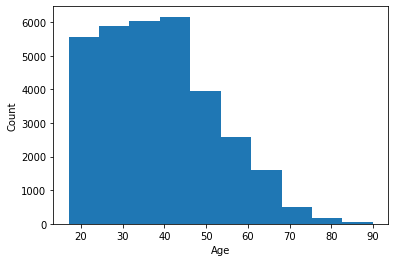

In [13]:
### BEGIN SOLUTION
plt.hist(income_data.age)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
### END SOLUTION

Let's get another view of the data. Split the ages into three:
1. Young people: $\text{age} \le 30$
2. Middle-aged people: $30 < \text{age} \le 60$
3. Old people: $60 < \text{age}$

Return the counts in the following function. Which age group has the most people? How many are there?

In [14]:
def get_num_people_by_age_category(dataframe):
    young, middle_aged, old = (0, 0, 0)
    ### BEGIN SOLUTION
    young = len(dataframe[dataframe.age <= 30])
    middle_aged = len(dataframe[(dataframe.age > 30) & (dataframe.age <= 60)])
    old = len(dataframe[dataframe.age > 60])
    ### END SOLUTION
    return young, middle_aged, old

In [15]:
young, middle_aged, old = get_num_people_by_age_category(income_data)
nose.tools.assert_greater(young, 0)
nose.tools.assert_greater(middle_aged, 0)
nose.tools.assert_greater(old, 0)
### BEGIN HIDDEN TESTS
test_young, test_middle_aged, test_old = get_num_people_by_age_category(income_data_test)
nose.tools.assert_equal(young, test_young)
nose.tools.assert_equal(middle_aged, test_middle_aged)
nose.tools.assert_equal(old, test_old)
nose.tools.assert_equal(young, 10572)
nose.tools.assert_equal(middle_aged, 19657)
nose.tools.assert_equal(old, 2332)
### END HIDDEN TESTS

Now we can create a bar chart. Execute the code below to see it.

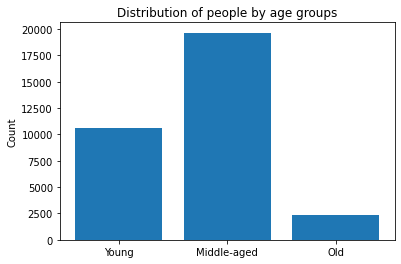

In [16]:
plt.title("Distribution of people by age groups")
plt.bar(range(3), [young, middle_aged, old])
plt.xticks(range(3), ["Young", "Middle-aged", "Old"])
plt.ylabel("Count")
plt.show()

### Problem 6. Native country (2 points)
Have a look at the native country of the people. The highest number of people are, as expected, from the US. What country makes for **the second highest** number of people? How many are they? Write a function to **calculate** and return the answer given a dataframe. DO NOT hardcode the answer, e.g. `return "Germany"`.

In [17]:
def get_second_highest_num_people(dataframe):
    num_people, country = 0, ""
    ### BEGIN SOLUTION
    people = income_data.groupby("native-country").count().income.nlargest(2)
    num_people = people.min()
    country = people.idxmin()
    ### END SOLUTION
    return num_people, country

In [18]:
num_people, country = get_second_highest_num_people(income_data)
nose.tools.assert_greater(num_people, 0)
nose.tools.assert_not_equal(country, "")
### BEGIN HIDDEN TESTS
nose.tools.assert_equal(num_people, 643)
nose.tools.assert_equal(country, "Mexico")
test_num_people, test_country = get_second_highest_num_people(income_data_test)
nose.tools.assert_equal(num_people, test_num_people)
nose.tools.assert_equal(country, test_country)
### END HIDDEN TESTS

### Problem 7. Busiest occupations (2 points)
Which people are most overworked? Group all data by occupation and calculate the mean hours per week for each group.

Write a function that **calculates and returns** all mean hours per week as a `Series`. Sort the results in descending order (most hours to fewest hours).

In [19]:
def get_mean_working_hours_by_occupation(dataframe):
    ### BEGIN SOLUTION
    groups = income_data.groupby("occupation").mean()["hours-per-week"]
    return groups.sort_values(ascending = False)
    ### END SOLUTION

In [20]:
hours = get_mean_working_hours_by_occupation(income_data)
print(hours)
nose.tools.assert_almost_equal(hours["Handlers-cleaners"], 37.95, delta = 0.01)
### BEGIN HIDDEN TESTS
nose.tools.assert_almost_equal(hours["Prof-specialty"], 42.38, delta = 0.01)
nose.tools.assert_almost_equal(hours["Farming-fishing"], 46.99, delta = 0.01)
nose.tools.assert_almost_equal(hours["?"], 31.91, delta = 0.01)
### END HIDDEN TESTS

occupation
Farming-fishing      46.989940
Exec-managerial      44.987703
Transport-moving     44.656230
Protective-serv      42.870570
Prof-specialty       42.386715
Craft-repair         42.304221
Sales                40.781096
Machine-op-inspct    40.755744
Armed-Forces         40.666667
Tech-support         39.432112
Handlers-cleaners    37.947445
Adm-clerical         37.558355
Other-service        34.701669
Priv-house-serv      32.885906
?                    31.906131
Name: hours-per-week, dtype: float64


Finally, let's plot a bar chart. Check the values carefully. If your do not match, feel free to edit the chart generation code below.

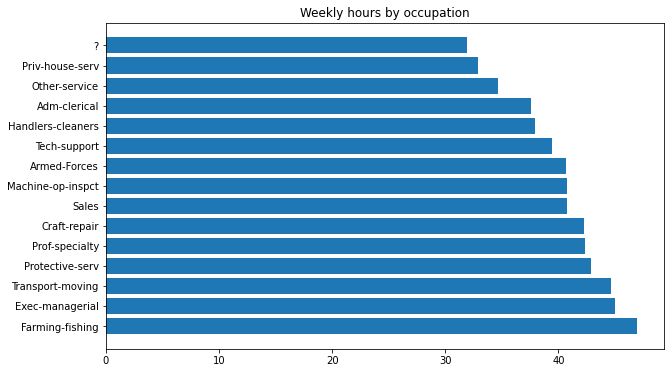

In [21]:
plt.figure(figsize = (10, 6))
plt.title("Weekly hours by occupation")
plt.barh(range(len(hours)), hours)
plt.yticks(list(range(len(hours))), hours.index)
plt.show()